In [10]:
# load data
import pandas as pd
import numpy as np
data_url = "http://lib.stat.cmu.edu/datasets/boston"
raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
feature = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
price = raw_df.values[1::2, 2]
print('data size = ', feature.shape)
print('target size = ', price.shape)
'''
from: data_url:
 Variables in order:
 CRIM     per capita crime rate by town
 ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
 INDUS    proportion of non-retail business acres per town
 CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
 NOX      nitric oxides concentration (parts per 10 million)
 RM       average number of rooms per dwelling
 AGE      proportion of owner-occupied units built prior to 1940
 DIS      weighted distances to five Boston employment centres
 RAD      index of accessibility to radial highways
 TAX      full-value property-tax rate per $10,000
 PTRATIO  pupil-teacher ratio by town
 B        1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town
 LSTAT    % lower status of the population
 MEDV     Median value of owner-occupied homes in $1000's
'''
feature_names = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT']


<>:5: SyntaxWarning: invalid escape sequence '\s'
<>:5: SyntaxWarning: invalid escape sequence '\s'
/var/folders/1l/_31fxbps5_db7ymc5ghngxz00000gn/T/ipykernel_54384/926882294.py:5: SyntaxWarning: invalid escape sequence '\s'
  raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)


data size =  (506, 13)
target size =  (506,)


In [11]:
# more details of data
df_feature = pd.DataFrame(feature, columns = feature_names)
df_target = pd.DataFrame(price, columns =['MEDV'])
df_boston = pd.concat([df_feature, df_target,], axis = 1)

In [12]:
df_boston.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [13]:
df_boston.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


<Figure size 640x480 with 0 Axes>

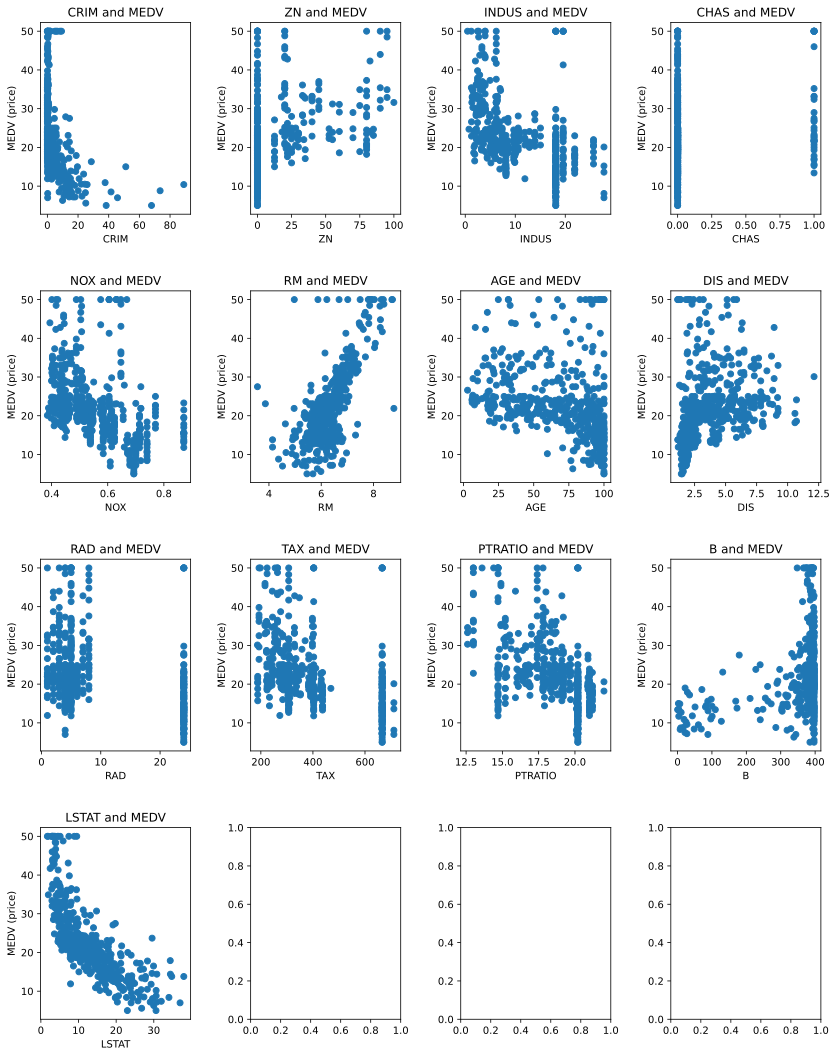

In [27]:
# 1 how does each feature relate to the price
import matplotlib.pyplot as plt
%config InlineBackend.figure_format = 'svg'
plt.figure()
fig,axes = plt.subplots(4, 4, figsize=(14,18))
fig.subplots_adjust(wspace=.4, hspace=.4)
img_index = 0
for i in range(len(feature_names)):
    row, col = i // 4, i % 4
    axes[row][col].scatter(feature[:,i], price)
    axes[row][col].set_title(feature_names[i] + ' and MEDV')
    axes[row][col].set_xlabel(feature_names[i])
    axes[row][col].set_ylabel('MEDV (price)')
plt.savefig('linear_f1.pdf')
plt.show()

<Figure size 640x480 with 0 Axes>

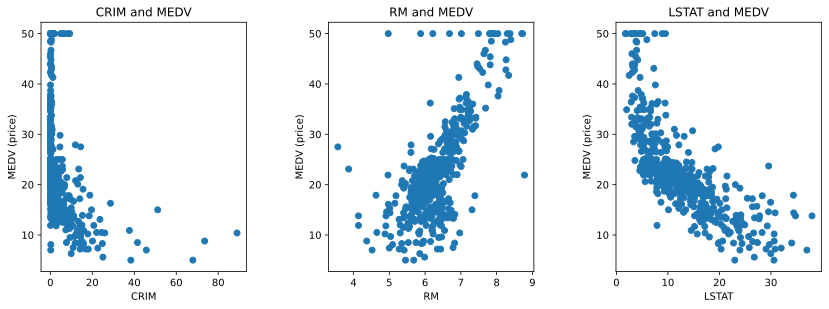

In [30]:
picked = ["CRIM", "RM", "LSTAT"]
plt.figure()
fig,axes = plt.subplots(1, 3, figsize=(14,4.5))
fig.subplots_adjust(wspace=.4, hspace=.4)
img_index = 0
pickedidx = 0
for i in range(len(feature_names)):
    row, col = 0, pickedidx
    if feature_names[i] in picked:
        pickedidx += 1
        axes[col].scatter(feature[:,i], price)
        axes[col].set_title(feature_names[i] + ' and MEDV')
        axes[col].set_xlabel(feature_names[i])
        axes[col].set_ylabel('MEDV (price)')
    else:
        continue
plt.savefig('linear_f2.pdf')
plt.show()

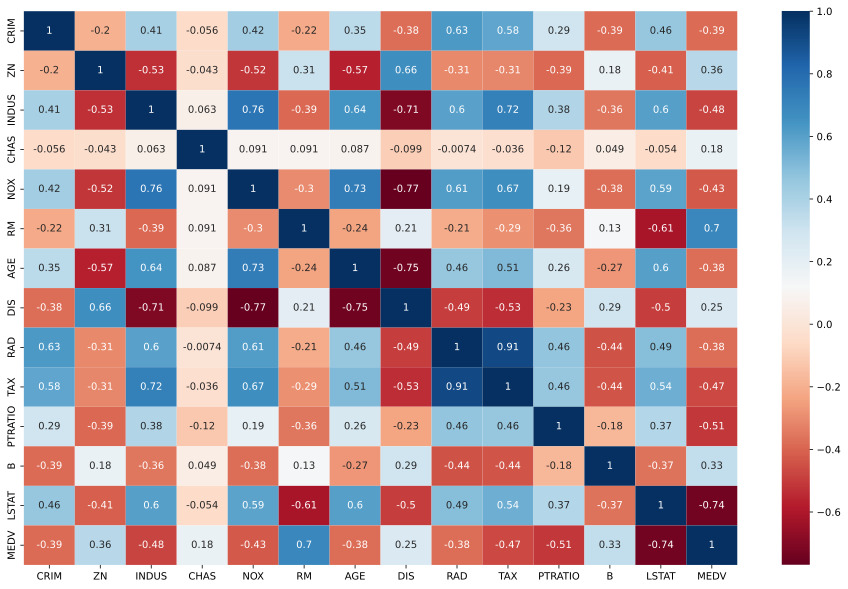

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
CRIM,1.000000,-0.200469,0.406583,-0.055892,0.420972,-0.219247,0.352734,-0.379670,0.625505,0.582764,0.289946,-0.385064,0.455621,-0.388305
ZN,-0.200469,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,0.175520,-0.412995,0.360445
INDUS,0.406583,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,-0.356977,0.603800,-0.483725
CHAS,-0.055892,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,0.048788,-0.053929,0.175260
NOX,0.420972,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.590879,-0.427321
RM,-0.219247,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.613808,0.695360
AGE,0.352734,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,-0.273534,0.602339,-0.376955
DIS,-0.379670,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.496996,0.249929
RAD,0.625505,-0.311948,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.488676,-0.381626
TAX,0.582764,-0.314563,0.720760,-0.035587,0.668023,-0.292048,0.506456,-0.534432,0.910228,1.000000,0.460853,-0.441808,0.543993,-0.468536


In [18]:
# 2 correlation matrix
import seaborn as sns
fig, ax = plt.subplots(figsize=(16, 10))
correlation = df_boston.corr()
sns.heatmap(correlation, annot = True, cmap = 'RdBu')
plt.savefig('correlation.pdf')
plt.show()
correlation

In [ ]:
# train-test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(feature, price, test_size=0.3, random_state=8)

array([[7.84200e-01, 0.00000e+00, 8.14000e+00, ..., 2.10000e+01,
        3.86750e+02, 1.46700e+01],
       [5.05900e-02, 0.00000e+00, 4.49000e+00, ..., 1.85000e+01,
        3.96900e+02, 9.62000e+00],
       [5.87205e+00, 0.00000e+00, 1.81000e+01, ..., 2.02000e+01,
        3.96900e+02, 1.93700e+01],
       ...,
       [2.68380e-01, 0.00000e+00, 9.69000e+00, ..., 1.92000e+01,
        3.96900e+02, 1.41000e+01],
       [6.15100e-02, 0.00000e+00, 5.19000e+00, ..., 2.02000e+01,
        3.96900e+02, 9.29000e+00],
       [5.44114e+00, 0.00000e+00, 1.81000e+01, ..., 2.02000e+01,
        3.55290e+02, 1.77300e+01]])

In [34]:
# 3 linear regression and ridge regression
import numpy as np

def least_square(X, y):
    #TODO
    theta = np.zeros(X.shape[1])
    theta = np.linalg.inv(X.T @ X) @ X.T @ y
    return theta

# apply linear regression
theta = least_square(X_train, y_train)
df_theta = pd.DataFrame(zip(feature_names, theta),columns=['Feature','Coeff'])
df_theta

,Feature,Coeff
0,CRIM,-0.099324
1,ZN,0.052251
2,INDUS,0.004516
3,CHAS,2.957261
4,NOX,1.127938
5,RM,5.854198
6,AGE,-0.014957
7,DIS,-0.920844
8,RAD,0.159519
9,TAX,-0.008934


In [32]:
def ridge_reg(X, y, eta):
    #TODO
    theta = np.zeros(X.shape[1])
    theta = np.linalg.inv(X.T @ X + eta/2 * np.identity(X.shape[1])) @ X.T @ y
    return theta

# apply ridge regression
theta_r = ridge_reg(X_train, y_train, 15.0)
df_theta_r = pd.DataFrame(zip(feature_names, theta_r),columns=['Feature','Coeff'])
df_theta_r

,Feature,Coeff
0,CRIM,-0.100648
1,ZN,0.054632
2,INDUS,0.012958
3,CHAS,2.272783
4,NOX,0.457674
5,RM,5.728152
6,AGE,-0.010094
7,DIS,-0.896985
8,RAD,0.163084
9,TAX,-0.008982


In [50]:
eta_values = [15.0, 30.0, 45.0]
df_list = []

for eta in eta_values:
    theta_r = ridge_reg(X_train, y_train, eta)
    df_temp = pd.DataFrame(zip(feature_names, theta_r), columns=['Feature', f'Coeff_eta_{eta}'])
    df_list.append(df_temp)
df_merged = df_theta
for df in df_list[0:]:
    df_merged = pd.merge(df_merged, df, on='Feature')
latextable = df_merged.to_latex()
#print(latextable)

In [ ]:
# 4 evaluation
def pred_fn(X, theta):
    #TODO
    pred = None
    pred = X @ theta
    return pred

def root_mean_square_error(pred, y):
    #TODO
    rmse = None
    rmse = np.sqrt(np.mean((pred - y) ** 2))
    return rmse


evaluation = pd.DataFrame(columns=['Model', 'RMSE_test', 'RMSE_train'])
df_merged.columns = ["Model","OLR", "Ridge_eta_15", "Ridge_eta_30", "Ridge_eta_45"]
for col in df_merged.columns[1:]:
    model_name = col  # 模型名称就是列名
    theta = df_merged[col].values
    pred_train = pred_fn(X_train, theta)
    pred_test = pred_fn(X_test, theta)
    rmse_train = root_mean_square_error(pred_train, y_train)
    rmse_test = root_mean_square_error(pred_test, y_test)
    
    # 构造一行 DataFrame
    new_row = pd.DataFrame([{'Model': model_name, 'RMSE_test': rmse_test, 'RMSE_train': rmse_train}])
    evaluation = pd.concat([evaluation, new_row], ignore_index=True)
    
print(evaluation) 
latextable = evaluation.to_latex()

print(latextable)

          Model  RMSE_test  RMSE_train
0           OLR   5.209218    4.820627
1  Ridge_eta_15   5.191204    4.826364
2  Ridge_eta_30   5.187847    4.837923
3  Ridge_eta_45   5.189540    4.852552
\begin{tabular}{llrr}
\toprule
 & Model & RMSE_test & RMSE_train \\
\midrule
0 & OLR & 5.209218 & 4.820627 \\
1 & Ridge_eta_15 & 5.191204 & 4.826364 \\
2 & Ridge_eta_30 & 5.187847 & 4.837923 \\
3 & Ridge_eta_45 & 5.189540 & 4.852552 \\
\bottomrule
\end{tabular}



/var/folders/1l/_31fxbps5_db7ymc5ghngxz00000gn/T/ipykernel_54384/3526751403.py:27: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  evaluation = pd.concat([evaluation, new_row], ignore_index=True)


In [111]:
# 5 linear models of top-3 features
# linear regression using top-3 features
    #TODO
picked = ["LSTAT", "RM", "PTRATIO"]
newdataset = df_boston[picked]
newdataset['MEDV'] = df_boston['MEDV']
X_train, X_test, y_train, y_test = train_test_split(newdataset[picked], newdataset['MEDV'], test_size=0.3, random_state=8)
theta = least_square(X_train, y_train)
df_theta = pd.DataFrame(zip(picked, theta),columns=['Feature','Coeff'])
df_theta
# ridge regression using top-3 features
    #TODO
eta = 15.0
theta_r = ridge_reg(X_train, y_train, eta)
df_theta_r = pd.DataFrame(zip(picked, theta_r),columns=['Feature','Coeff'])
df_theta_r
# evaluation

pred_train = pred_fn(X_train.values, theta)
pred_test = pred_fn(X_test.values, theta)
rmse_train = root_mean_square_error(pred_train, y_train)
rmse_test = root_mean_square_error(pred_test, y_test)
pred_train_r = pred_fn(X_train.values, theta_r)
pred_test_r = pred_fn(X_test.values, theta_r)
rmse_train_r = root_mean_square_error(pred_train_r, y_train)
rmse_test_r = root_mean_square_error(pred_test_r, y_test)
evaluation = pd.DataFrame(columns=['Model', 'RMSE_test', 'RMSE_train']) 
results = [
    {'Model': 'Linear Regression', 'RMSE_test': rmse_test, 'RMSE_train': rmse_train},
    {'Model': 'Ridge Regression', 'RMSE_test': rmse_test_r, 'RMSE_train': rmse_train_r}
]
evaluation = pd.DataFrame(results)
latextable = evaluation.to_latex()
print(latextable)

\begin{tabular}{llrr}
\toprule
 & Model & RMSE_test & RMSE_train \\
\midrule
0 & Linear Regression & 5.494724 & 5.273362 \\
1 & Ridge Regression & 5.481155 & 5.275046 \\
\bottomrule
\end{tabular}



/var/folders/1l/_31fxbps5_db7ymc5ghngxz00000gn/T/ipykernel_54384/1163903982.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  newdataset['MEDV'] = df_boston['MEDV']
